# Data Exploration - CADC Dataset

### CADC Dataset Structure

The CADC dataset is organized into folders based on date and session. Here's an overview:

```python
cadcd = {
    '2018_03_06': [
        '0001', '0002', '0005', '0006', '0008', '0009', '0010',
        '0012', '0013', '0015', '0016', '0018'
    ],
    '2018_03_07': [
        '0001', '0002', '0004', '0005', '0006', '0007'
    ],
    '2019_02_27': [
        '0002','0003','0004','0005','0006','0008','0009','0010',
        '0011','0013','0015','0016','0018','0019','0020',
        '0022','0024','0025','0027','0028','0030',
        '0031','0033','0034','0035','0037','0039','0040',
        '0041','0043','0044','0045','0046','0047','0049','0050',
        '0051','0054','0055','0056','0058','0059',
        '0060','0061','0063','0065','0066','0068','0070',
        '0072','0073','0075','0076','0078','0079',
        '0080','0082'
    ]
}



### Import Necessary Libraries

To begin our analysis, let's import the essential Python libraries and packages required for our exploration.

In [65]:
from anytree import Node, RenderTree
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import json
import yaml
import os

### Data Download and Exploration

For the Data Exploration we've downloaded manually one of the folders from the data. 
Specifically, we'll be exploring the '2018_03_06' -> '0001' -> 'labeled' folder.

To download the necessary data for exploration, you can use the following commands in your terminal or command prompt:

```bash
pip install wget

wget http://wiselab.uwaterloo.ca/cadcd_data/2018_03_06/0001/labeled.zip
wget http://wiselab.uwaterloo.ca/cadcd_data/2018_03_06/calib.zip
wget http://wiselab.uwaterloo.ca/cadcd_data/2018_03_06/0001/3d_ann.json


Now that we have downloaded the labeled data, the calibration folder, and the 3D annotations, let's explore the contents of the 'labeled' folder. The '0001' folder contains the 'labeled' folder and the '3d_ann' file.

#### How does the 'labeled' folder look like

In [56]:
def display_immediate_subfolders(folder_path="."):
    print(f"Subfolders in {folder_path}:")
    for dir_name in next(os.walk(folder_path))[1]:
        print(dir_name)

display_immediate_subfolders(r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled')

Subfolders in C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled:
image_00
image_01
image_02
image_03
image_04
image_05
image_06
image_07
lidar_points
novatel


Each data folder has this structure. Each image_00, image_01,..., image_07 folders corresponds to each of the 8 cameras in Autonomoose. 'Lidar_points' folder contains the lidar points data at each timestamp, and novatel provides information such as precise geographical coordinates, orientation angles, and positional accuracy metrics derived from an Inertial Measurement Unit (IMU) system.

#### Let's take a look at the folders' structure inside 'labeled'

In [57]:
def build_folder_tree(folder_path="."):
    root = Node(os.path.basename(folder_path), path=folder_path)
    for root_dir, dirs, files in os.walk(folder_path):
        current_dir = root
        for dir_name in os.path.relpath(root_dir, folder_path).split(os.sep):
            current_dir = Node(dir_name, parent=current_dir)
        for file_name in files:
            Node(file_name, parent=current_dir)
    return root

def display_folder_tree(root_node):
    for pre, _, node in RenderTree(root_node):
        print("{}{}".format(pre, node.name))

folder_tree = build_folder_tree(r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled')
display_folder_tree(folder_tree)

labeled
├── .
├── image_00
│   └── timestamps.txt
├── image_00
│   └── data
│       ├── 0000000000.png
│       ├── 0000000001.png
│       ├── 0000000002.png
│       ├── 0000000003.png
│       ├── 0000000004.png
│       ├── 0000000005.png
│       ├── 0000000006.png
│       ├── 0000000007.png
│       ├── 0000000008.png
│       ├── 0000000009.png
│       ├── 0000000010.png
│       ├── 0000000011.png
│       ├── 0000000012.png
│       ├── 0000000013.png
│       ├── 0000000014.png
│       ├── 0000000015.png
│       ├── 0000000016.png
│       ├── 0000000017.png
│       ├── 0000000018.png
│       ├── 0000000019.png
│       ├── 0000000020.png
│       ├── 0000000021.png
│       ├── 0000000022.png
│       ├── 0000000023.png
│       ├── 0000000024.png
│       ├── 0000000025.png
│       ├── 0000000026.png
│       ├── 0000000027.png
│       ├── 0000000028.png
│       ├── 0000000029.png
│       ├── 0000000030.png
│       ├── 0000000031.png
│       ├── 0000000032.png
│       ├── 0000000033.png
│     

We can see each camera (image_##) has 100 images, which means this data folder has 100 timestamps of data recorded.

# Exploring Dataset Folders

In this notebook, our focus is on delving deeper into the contents of the 'labeled' directory and its associated folders:

## 1. Labeled Folder Contents

### 1.1. Image-00 to Image-07
We will investigate the data within these subfolders, which contain images captured from different perspectives using eight cameras.

### 1.2. Lidar Points
This section explores the Lidar data present in the 'labeled' folder, providing insights into the spatial information collected by the Lidar sensors.

### 1.3. Novatel
An exploration of the 'novatel' folder. This data includes precise geographical coordinates, orientation angles, and positional accuracy metrics derived from an Inertial Measurement Unit (IMU) system.

## 2. Complementary Folders

### 2.1. Calib Folder
We'll take a closer look at the 'calib' folder, which plays a crucial role in achieving a high-quality multi-sensor dataset. This folder contains calibration information, including intrinsic and extrinsic parameters for cameras, LiDAR, and IMU.

### 2.2. 3D Annotations
Exploration of the '3D annotations' folder, investigating the format and content of the annotations. This section aims to provide insights into the annotations' structure and their relevance for 3D object detection tasks.


### 1.1. Image-00 to Image-07

### Visualization of Images from the 8 Cameras

To begin our analysis, we will examine the visual data captured by the eight cameras on the Autonomoose vehicle. The sensor configuration, depicted below, illustrates the strategic placement of cameras to provide comprehensive coverage. This multi-camera setup is designed to capture a holistic view of the vehicle's surroundings and plays a crucial role in tasks such as object detection, tracking, and overall environmental awareness.

<img src="autonomoose_sensors.png" alt="Sample Image" width="400" height="300">

In this exploration, our focus is on gaining insights into the quality and diversity of the images captured by the eight cameras. This understanding is foundational for subsequent tasks, specifically, object detection and tracking. With that said let us take a llok at these 8 images at the first timestamp in the folder 'labeled', So basically we'll show the first image of each image_00, image_01, ... folder.


Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_00\data\0000000000.png


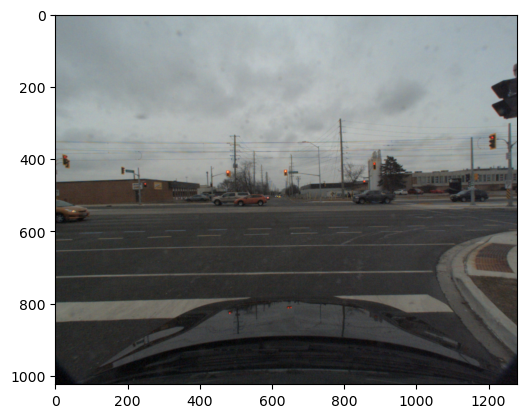

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_01\data\0000000000.png


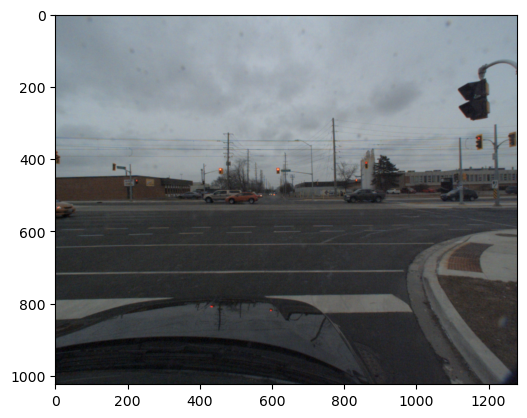

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_02\data\0000000000.png


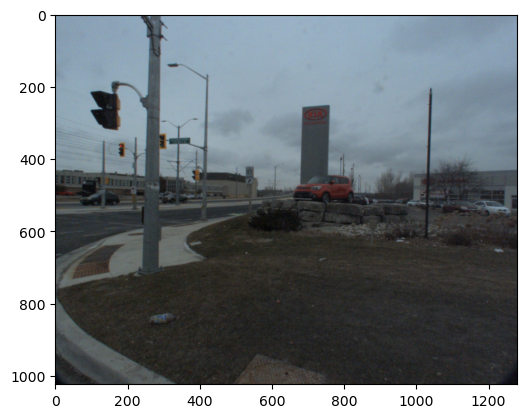

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_03\data\0000000000.png


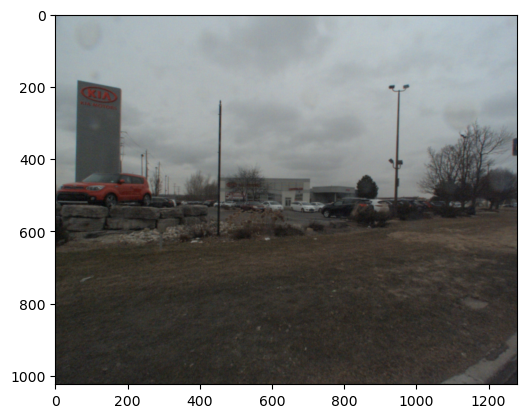

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_04\data\0000000000.png


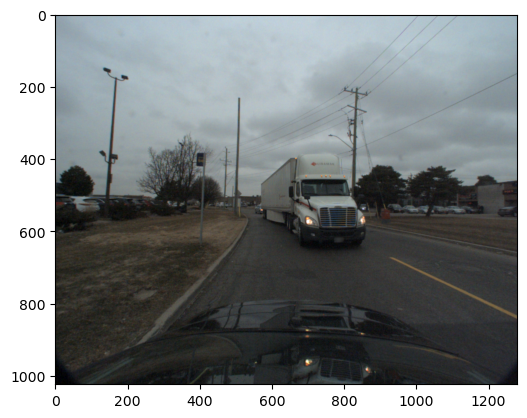

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_05\data\0000000000.png


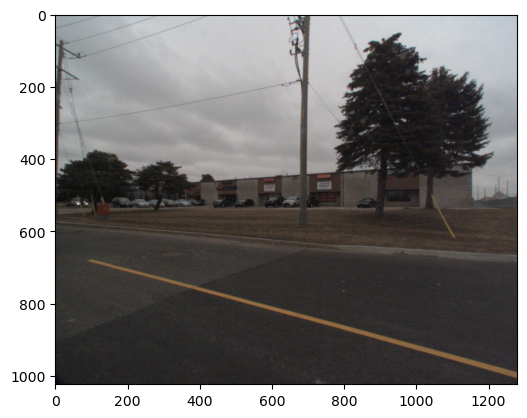

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_06\data\0000000000.png


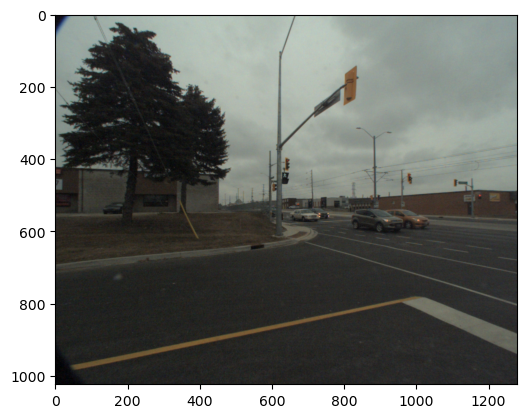

Checking for image in: C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\image_07\data\0000000000.png


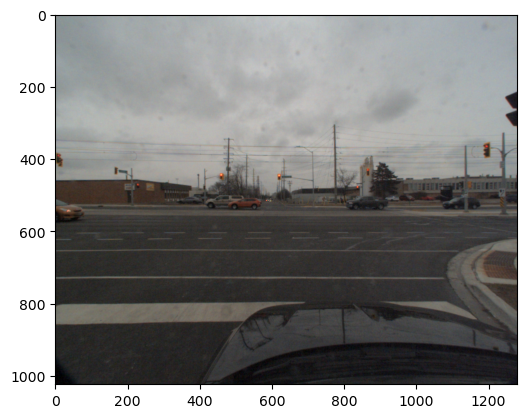

In [58]:
# Define the parent directory where the 'labeled' folder is located
parent_directory = r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled'

# List of subfolders (image_00, image_01, ..., image_07)
subfolders = ['image_{:02d}'.format(i) for i in range(8)]

# Loop through each subfolder and display the first image
for subfolder in subfolders:
    folder_path = os.path.join(parent_directory, subfolder, 'data') 
    image_path = os.path.join(folder_path, '0000000000.png')  

    print(f"Checking for image in: {image_path}")

    try:
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.show()
    except FileNotFoundError:
        print(f"Image not found in {folder_path}")
    except Exception as e:
        print(f"An error occurred while opening {image_path}: {str(e)}")


### 1.2. Lidar Points

### Visualization of Lidar Data

Now, we'll take a look at the Lidar data captured simultaneously with the images examined above. Lidar, with its ability to provide detailed 3D spatial information, is crucial for tasks like object detection and mapping. 

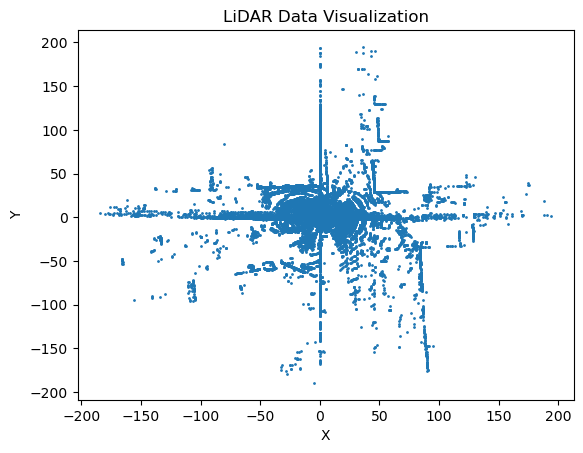

In [59]:
# Define the path to the LiDAR data file
lidar_data_path = r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\lidar_points\data\0000000000.bin'

try:
    lidar_data = np.fromfile(lidar_data_path, dtype=np.float32)

    # Reshape the data into points 
    lidar_data = lidar_data.reshape(-1, 3)

    # Extract x, y, and z coordinates
    x = lidar_data[:, 0]
    y = lidar_data[:, 1]
    z = lidar_data[:, 2]

    # Create a 2D scatter plot of the LiDAR points
    plt.scatter(x, y, s=1) 

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('LiDAR Data Visualization')

    plt.show()

except FileNotFoundError:
    print(f"LiDAR data file not found: {lidar_data_path}")
except Exception as e:
    print(f"An error occurred while reading LiDAR data: {str(e)}")


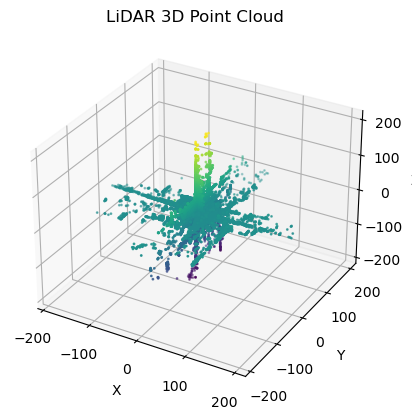

In [60]:
lidar_data_path = r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\lidar_points\data\0000000000.bin'

try:
    lidar_data = np.fromfile(lidar_data_path, dtype=np.float32)

    # Reshape the data into points 
    lidar_data = lidar_data.reshape(-1, 3)

    # Extract x, y, and z coordinates
    x = lidar_data[:, 0]
    y = lidar_data[:, 1]
    z = lidar_data[:, 2]

    # Create a 3D scatter plot of the LiDAR points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=1, c=z, cmap='viridis')  

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('LiDAR 3D Point Cloud')

    plt.show()

except FileNotFoundError:
    print(f"LiDAR data file not found: {lidar_data_path}")
except Exception as e:
    print(f"An error occurred while reading LiDAR data: {str(e)}")


### 1.3. Novatel

### Exploring the 'novatel' Folder

The "novatel" folder houses data formatted in alignment with the INSPVAX message from NovAtel. This data provides crucial information, including precise geographical coordinates, orientation angles, and accuracy metrics derived from an Inertial Measurement Unit (IMU) system. This information is available for every timestamp within the data folder.

Let's see what's inside the 'novatel' folder.

In [40]:
novatel_folder_path = r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\novatel'
display_folder_contents(novatel_folder_path)

Contents of C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\novatel:
data
dataformat.txt
timestamps.txt


In [30]:
text_file_path = os.path.join(r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\novatel', 'dataformat.txt')
text_file_content = read_text_file(text_file_path)

print(f"\nContent of dataformat:\n{text_file_content}")


Content of dataformat:
Converted from Inertial Explorer output to match novatel INSPVAX message.
http://docs.ros.org/api/novatel_msgs/html/msg/INSPVAX.html
More information on page 148 of SPANÂ® on OEM6Â® Firmware Reference Manual
https://www.novatel.com/assets/Documents/Manuals/OM-20000144UM.pdf

latitude (degrees)
longitude (degrees)
altitude (m)
undulation (m)
latitude_std (m)
longitude_std (m)
altitude_std (m)
roll (degrees)
pitch (degrees)
azimuth (degrees)
roll_std (degrees)
pitch_std (degrees)
azimuth_std (degrees)
ins_status
position_type



Next, let's take a look at one of these files for the first image of the subset of data we've been exploring.

In [34]:
text_file_path = os.path.join(r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\labeled\labeled\novatel\data', '0000000000.txt')
text_file_content = read_text_file(text_file_path)

print(f"\nContent of first(1/100) timestamp (novatel):\n{text_file_content}")


Content of first(1/100) timestamp (novatel):
43.5003168582 -80.5378339065 343.513 -36.3860015869 0.00700000021607 0.00800000037998 0.01600000076 1.0145707453 -2.1401921705 155.178663104 0.00320116127841 0.00322570698336 0.0129697006196 0 0


### 2.1. Calib Folder

### Calibration Folder Exploration

In the context of a multi-sensor dataset, achieving high-quality results hinges on precise calibration of both extrinsics and intrinsics for each sensor. Let's delve into the contents of the calibration folder to understand the crucial information it holds.

#### Importance of Calibration

Calibrating sensor extrinsics and intrinsics ensures precise alignment and synchronization of data from multiple sensors. This alignment is fundamental for accurate spatial mapping, object detection, and tracking. It enhances the reliability and robustness of downstream tasks in autonomous systems or computer vision applications.

In our exploration, we will inspect these calibration files to gain insights into how sensors are configured and synchronized, contributing to the overall quality and accuracy of the dataset.


In [61]:
def display_folder_contents(folder_path="."):
    print(f"Contents of {folder_path}:")
    for item in os.listdir(folder_path):
        print(item)

def read_text_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    return content

calib_folder_path = r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\calib\calib'
display_folder_contents(calib_folder_path)


Contents of C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\calib\calib:
00.yaml
01.yaml
02.yaml
03.yaml
04.yaml
05.yaml
06.yaml
07.yaml
extrinsics.yaml
README.txt


### Exploration of Calibration Folder

Let's take a closer look at the contents of the calibration folder, which plays a pivotal role in ensuring the accuracy of our multi-sensor dataset.

#### Contents of the Calibration Folder (C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\calib\calib)

- **00.yaml to 07.yaml:**
  - These YAML files contain intrinsic parameters for eight different cameras. Intrinsic parameters include focal length, principal point, and lens distortion coefficients, providing critical information for camera calibration.

- **extrinsics.yaml:**
  - This file encompasses extrinsic parameters that define the spatial relationships between various sensors in the system. Understanding these extrinsics is vital for accurate alignment and fusion of sensor data in a 3D space.

- **README.txt:**
  - A README file is included, potentially providing additional information or instructions related to the calibration process. It's advisable to review this file for any specific details regarding the calibration setup.

The intrinsic and extrinsic parameters contained in these files are foundational for achieving accurate data fusion, spatial mapping, and subsequent computer vision tasks. In our exploration, we will delve into these calibration files to better comprehend how sensors are configured and synchronized, contributing to the overall quality and precision of our dataset.


In [29]:
text_file_path = os.path.join(calib_folder_path, 'README.txt')
text_file_content = read_text_file(text_file_path)

print(f"\nContent of README:\n{text_file_content}")


Content of README:
The following .yaml files contain intrinsic calibration parameters for each of the 8 cameras on the vehicle (Autonomoose). 

Each file contains the image width, height and camera name. The camera matrix is a 3x3 matrix in row major order. The distortion coefficients comprise of 3 radial and 2 tangential parameters respectively.




In [62]:
yaml_file_path = 'C:/Users/rafae/Documents/Capstone/cadc_devkit/2018_03_06/calib/calib/00.yaml'

with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)

print(yaml_content)

{'image_width': 1280, 'image_height': 1024, 'camera_name': 'camera_F', 'camera_matrix': {'rows': 3, 'cols': 3, 'data': [653.956033188809, -0.235925653043616, 653.221172545916, 0, 655.54008861796, 508.732863993917, 0, 0, 1]}, 'distortion_model': 'plumb_bob', 'distortion_coefficients': {'rows': 1, 'cols': 5, 'data': [-0.211078226790761, 0.101157542400588, -0.00032951581724786, 0.000330423801388672, -0.0232053947325804]}}


In [52]:
import yaml

yaml_file_path = 'C:/Users/rafae/Documents/Capstone/cadc_devkit/2018_03_06/calib/calib/extrinsics.yaml'

with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)

print(yaml_content)

{'T_BASELINK_LIDAR': [[1.0, 0.0, 0.0, 1.036723], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 1.927344], [0.0, 0.0, 0.0, 1.0]], 'T_LIDAR_GPSIMU': [[0.0146392923884, 0.999713733025, 0.0189246695892, -1.12495691821], [-0.999886807886, 0.0145708401517, 0.00374993783733, 0.0726605553018], [0.00347311601847, -0.0189774239023, 0.999813880103, -1.25], [0.0, 0.0, 0.0, 1.0]], 'T_00CAMERA_00IMU': [[-0.00262711825803, -0.999992501851, -0.00284508194841, -0.00558203], [0.00416432833371, 0.00283412692047, -0.999987312967, -0.02379254], [0.999987878236, -0.00263893278306, 0.00415685152237, -0.03597198], [0.0, 0.0, 0.0, 1.0]], 'T_03CAMERA_03IMU': [[0.000964546529586, -0.999998558933, 0.0013970619694, -0.0032547], [-0.00215292032412, -0.0013991359723, -0.999996703671, -0.02650615], [0.999997217288, 0.000961535587015, -0.00215426675336, -0.04550535], [0.0, 0.0, 0.0, 1.0]], 'T_LIDAR_00CAMERA': [[0.0139568, -0.00513276, 0.999877, 0.529813], [-0.999776, 0.0150765, 0.0140207, 0.0554466], [-0.0151347, -0.999861, -

The provided YAML data represents the extrinsic calibration parameters between different sensors in the autonomous vehicle system. Here's a brief explanation:

- **T_BASELINK_LIDAR**: Transformation matrix between the baselink and the lidar sensor. It includes translation (1.036723, 0.0, 1.927344) and a 3x3 rotation matrix.

- **T_LIDAR_GPSIMU**: Transformation matrix between the lidar, GPS, and IMU sensors. It includes translation (-1.12495691821, 0.0726605553018, -1.25) and a 3x3 rotation matrix.

- **T_00CAMERA_00IMU** to **T_07CAMERA_00CAMERA**: Transformation matrices between different camera and IMU sensors. Each matrix includes translation and a 3x3 rotation matrix.

- **T_LIDAR_00CAMERA** to **T_LIDAR_CAM07**: Transformation matrices between the lidar sensor and different camera sensors. Each matrix includes translation and a 3x3 rotation matrix.

These matrices define the spatial relationships and orientations between various sensors in the vehicle, essential for accurately combining data from different sensors for tasks like sensor fusion and localization in autonomous driving systems.


### Data Alignment Between Sensors and Cameras

To ensure a high-quality multi-sensor dataset, meticulous calibration of both extrinsics and intrinsics for each sensor is paramount. Extrinsics are expressed relative to the ego frame, representing the midpoint of the rear vehicle axle.

The key calibration steps include:

- **LiDAR Extrinsics**
- **Camera Extrinsics**
- **Camera Intrinsic Calibration**
- **IMU Extrinsics**


### 2.2. 3D Annotations

### 3D Annotation Exploration

In this section, we explore the 3d_ann.json file, examining its format and contents. Our objective is to understand the structure of the annotations and assess their readiness for integration with object detection models. 

We will also analyze the distribution of labels to identify the most common objects present in the dataset. 

Let's begin by inspecting the annotations for the first image to gain insights into the data format and its compatibility with different models.

In [63]:
annotation_file_path =  r'C:\Users\rafae\Documents\Capstone\cadc_devkit\2018_03_06\0001\3d_ann.json'

try:
    with open(annotation_file_path, 'r') as json_file:
        annotation_data = json.load(json_file)


    print(f"Number of features (images): {len(annotation_data)}")

    # Print the keys present in the first item (annotations for the first image)
    if len(annotation_data) > 0:
        first_image_annotations = annotation_data[0]
        
        # print the annotations for the first image
        print(f"Annotations for the first image:\n{first_image_annotations}")


except FileNotFoundError:
    print(f"Annotation file not found: {annotation_file_path}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {str(e)}")
except Exception as e:
    print(f"An error occurred while reading the annotation file: {str(e)}")

Number of features (images): 100
Annotations for the first image:
{'cuboids': [{'uuid': '10eb0d25-d5ba-446b-a6fc-b1e1c29e0499', 'label': 'Truck', 'position': {'x': -19.10966344067156, 'y': -0.9994196630418124, 'z': -0.28325530444985225}, 'dimensions': {'x': 2.609, 'y': 21.222, 'z': 4.31}, 'yaw': 0.2475953980193629, 'stationary': False, 'camera_used': 7, 'attributes': {'state': 'Moving', 'truck_type': 'Semi_Truck'}, 'points_count': 2395}, {'uuid': '727b36b3-da90-4b15-8ffb-42372dd77803', 'label': 'Car', 'position': {'x': -9.376033925950999, 'y': 32.674561948543115, 'z': -1.0012837807660384}, 'dimensions': {'x': 1.648, 'y': 4.352, 'z': 1.451}, 'yaw': -1.5543172772108422, 'stationary': True, 'camera_used': None, 'attributes': {'state': 'Parked'}, 'points_count': 112}, {'uuid': '92a3edd0-b6e3-4c67-bcc2-62e8b386aec9', 'label': 'Car', 'position': {'x': -17.99813181674196, 'y': 32.52045143245261, 'z': -0.9221325934825185}, 'dimensions': {'x': 1.805, 'y': 4.589, 'z': 1.879}, 'yaw': 1.6221844121

The data format, consisting of annotated cuboids with attributes such as label, position, dimensions, and orientation, is well-suited for 3D object detection and tracking models. To enhance compatibility and utility for a broader range of models, ensuring consistency in labeling conventions, handling variations in object scales, and addressing potential occlusion scenarios could be essential steps. Additionally, assessing the model's tolerance for varying object densities and ensuring proper alignment with model input requirements would be crucial considerations. Overall, the dataset seems well-suited for models that can leverage both image and 3D spatial information for accurate object detection and tracking in diverse scenarios.

#### What Are the Top 3 Label Classes?

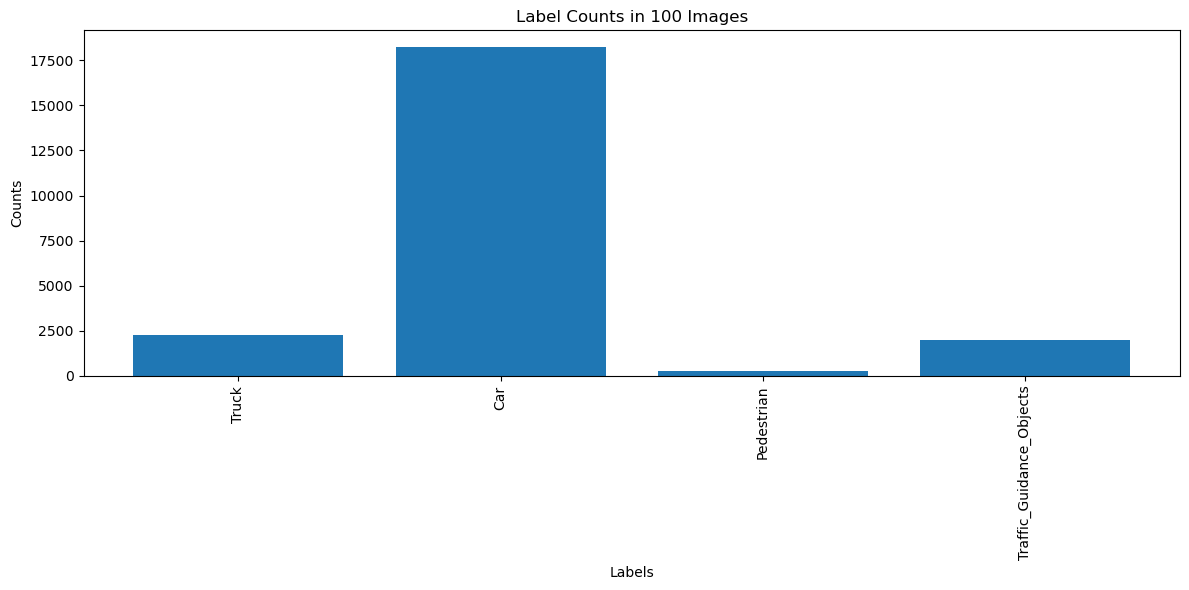

In [54]:
with open(annotation_file_path, 'r') as json_file:
    annotation_data = json.load(json_file)

# Initialize a counter for labels
label_counter = Counter()

# Loop through all images and count labels
for image_annotations in annotation_data:
    for cuboid in image_annotations.get('cuboids', []):
        label = cuboid.get('label')
        if label:
            label_counter[label] += 1

# Get all unique labels and their counts
labels = list(label_counter.keys())
label_counts = list(label_counter.values())

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, label_counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Counts in 100 Images')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [64]:
with open(annotation_file_path, 'r') as json_file:
    annotation_data = json.load(json_file)

# Initialize a counter for labels
label_counter = Counter()

# Loop through all images and count labels
for image_annotations in annotation_data:
    for cuboid in image_annotations.get('cuboids', []):
        label = cuboid.get('label')
        if label:
            label_counter[label] += 1

# Get the top three labels
top_labels = label_counter.most_common(3)

print("Top three labels:")
for label, count in top_labels:
    print(f"{label}: {count} times")


Top three labels:
Car: 18241 times
Truck: 2294 times
Traffic_Guidance_Objects: 2000 times


##### Label Frequency Analysis

The analysis of label frequencies in the dataset reveals key insights into the composition and characteristics of the annotated data:

##### Top Three Labels

1. **Car: 18241 times**
   - The high occurrence of the "Car" label indicates a prevalent presence in the dataset, so the model should prioritize accurate detection and classification of cars. Also, it's importatnt to ensure the model is well-designed to recognize and distinguish cars, leveraging the abundance of car instances for robust learning.

2. **Truck: 2294 times**
   - While less frequent than cars, the presence of trucks introduces diversity in object types. This diversity is valuable for training a model capable of distinguishing between different classes of vehicles. The model should be tailored to accurately identify and differentiate trucks, potentially requiring focused attention on features specific to trucks.

3. **Traffic_Guidance_Objects: 2000 times**
   - The inclusion of "Traffic_Guidance_Objects" suggests instances related to traffic guidance, such as cones or signs. Training the model to recognize these objects contributes to a comprehensive understanding of the traffic environment. 
   
Not less important Pedestrians are the 4th category in this subset of the dataset.
   
   
4. **Pedestrian: Below 400 times**
   - The presence of pedestrians introduces a different category of objects that require specific attention. While less frequent, accurate detection of pedestrians is crucial for ensuring the safety of autonomous systems. Despite the lower frequency, we should give attention to training the model to detect and avoid pedestrians, addressing potential imbalances in class distribution.

##### Overall Insights

- **Class Imbalance:** The dataset exhibits class imbalance, with "Car" being significantly more frequent than "Truck" and "Traffic_Guidance_Objects." Techniques like weighted loss functions can be considered to address this during training.
- **Diversity:** The presence of multiple object classes contributes to a diverse training set, allowing the model to learn features associated with various types of objects encountered in real-world scenarios.




## Utilizing Demo Scripts

For enhanced understanding and practical application, the open-source data providers offer useful demonstration scripts within the GitHub repository. These scripts showcase key functionalities and provide a hands-on approach to working with the CADC dataset.

### Camera Image and 3D Annotation Demo (run_demo_tracklets.py)

This script demonstrates how to:

1. Load a camera image and its corresponding 3D annotation file.
2. Load calibration data for accurate sensor alignment.
3. Create and project each cuboid within the frame onto the camera image.

### Lidar Data Projection Demo (run_demo_lidar.py)

This script illustrates the process of:

1. Loading a camera image and the corresponding lidar file.
2. Loading calibration data for precise sensor alignment.
3. Projecting each lidar point onto the camera image, with point color scaled by depth.

These demonstration scripts serve as valuable resources for gaining hands-on experience with the dataset, understanding its intricacies, and preparing for subsequent stages of the project.


# Conclusion

In this exploration of the CADC dataset, we delved into various aspects of the data, gaining valuable insights into its structure and contents.

### Data  Insights

- **Image Data:** Examining images from eight cameras provided a comprehensive understanding of the dataset's visual information. The high-resolution images showcase the complexity and diversity of the captured scenes.

- **Lidar Data:** Visualization of Lidar data offered insights into the spatial information, revealing the dataset's 3D characteristics and its potential for detailed environmental mapping.

- **Annotations:** Exploring the 3D annotations shed light on the labeling format, essential for object detection. The provided annotations, with detailed information about objects' dimensions, positions, and attributes, contribute to the dataset's utility in training and evaluating detection models. The provided annotations can be readily used with models supporting 3D object detection.

- **Calibration Data:** The 'calib' folder provided crucial information for aligning sensor data, ensuring precise spatial alignment between different sensors. This calibration is fundamental for downstream tasks like sensor fusion.


Our exploration lays a strong foundation for further stages of the project. Understanding the data's intricacies, we can confidently proceed to preprocess the data and develop models for object detection and tracking. 


## References

- [CADC Devkit GitHub Repository](https://github.com/mpitropov/cadc_devkit/blob/master/README.md)
- [Canadian Adverse Driving Conditions Dataset Website](http://cadcd.uwaterloo.ca/)
- [Lyu, Y., Bai, L., Elhousni, M., & Huang, X. (2019). An Interactive LiDAR to Camera Calibration. Department of Electrical and Computer Engineering, Worcester Polytechnic Institute, Worcester, MA 01609, USA.](https://users.wpi.edu/~xhuang/pubs/2019_lyu_hpec.pdf)